# Майнор Интеллектуальный анализ данных / Введение в анализ данных
## Домашнее задание №4 (опциональное)
### Визуализация при обучении моделей машинного обучения

**Общая информация**

В этом задании вы вкратце пройдете цикл решения задачи анализа данных от первичного знакомства с данными до некоторого приемлемого качества решения задачи. Девиз задания - все интерпретируемо! Мы будем визуализировать результаты работы всех используемых методов из sklearn, чтобы понять, как они работают с нашими данными. Все инструменты были рассмотрены на семинарах, примеры для редких исключений приведены тут же в ноутбуке или по ссылкам.

**Срок сдачи:** 17 июня 2017, 23:59

При отправлении ДЗ на почту `hse.minor.dm+X@gmail.com` указывайте фамилию в названии файла, а тему письма оформляйте в следующем виде:
** [ИАД-X] Фамилия Имя ДЗ-4 **

Сопровождайте ваш код изображеними, комментариями и выводами.

Имейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

Задание основано на Kaggle соревновании [Leaf Classification](https://www.kaggle.com/c/leaf-classification/).

Дана информация о 990 листьях, каждый из которых был сорван с одного из 99 видов растений.</br> 
Необходимо построить модель, которая могла бы определить, к какому растению относится каждый лист.

Большую часть задания вы будете работать с черно-белыми изображениями листьев, а в конце поработаете также с готовыми признаковыми описаниями листьев.

## 0. Загрузка данных

Скачайте данные по ссылкам: [таблица](https://drive.google.com/file/d/1LBc2YeddvEvDaCQHktJPZgJ3tZhJSGHh/view?usp=sharing) и [архив](https://drive.google.com/file/d/1cY5v5T26-_nqLkrJ6yUIVPIhCp7tulSi/view?usp=sharing) с изображениями.

Загрузим таблицу - файл `table_data.csv`.

В нем вы можете найти
* id - идентификатор листика
* species - столбец с названием растения (класс)
* margin, shape, texture - некоторые признаки листьев

In [2]:
DATA_DIR = os.path.join('data')
IMG_DIR = os.path.join(DATA_DIR, 'images')

In [3]:
filepath = os.path.join(DATA_DIR, 'table_data.csv')
table_data = pd.read_csv(filepath)

In [4]:
print("Число классов: %d"%table_data.species.nunique())

Число классов: 99


In [5]:
table_data.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


## Создание контрольного и обучающих множеств (1 балл)

* Задайте `random_seed`, который необходимо будет использовать при **всех** случаях использования генератора случайных чисел
* С помощью LabelEncoder закодируйте столбец `species` из исходных данных - вы должны получить одномерный numpy массив с метками классов от 0 до 98
* В переменную `X` запишите значения признаков margin, shape, texture - вы должны получить numpy-матрицу
* Случайным образом разбейте данные на обучающую и контрольную выборку, причем так, чтобы в контрольной выборке содержалось по 2 объекта каждого класса.
* Сохраните индексы объектов обучающего и контрольного множеств в переменные train_idx и test_idx

#### Hint
[Это](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html#sklearn.model_selection.StratifiedShuffleSplit) может помочь, чтобы сгенерировать выборку с нужными пропорциями классов.

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit

In [7]:
random_seed = 42

In [8]:
le = LabelEncoder()
le = le.fit(table_data['species'])
y = le.transform(table_data['species'])

# x = table_data.iloc[:,2:]

sss = StratifiedShuffleSplit(n_splits=1, test_size=198, random_state=random_seed)
train_idx = np.ndarray
test_idx = np.ndarray
for train_idx, test_idx in sss.split(table_data['id'], y):
    train_idx = train_idx
    test_idx = test_idx

In [9]:
# train_idx - array indices - 792 - from 0 to 990
# test_idx - array indices - 198 - from 0 to 990
leaf_train_ids = table_data['id'][train_idx] # series - 792 - from 1 to 1584
leaf_test_ids = table_data['id'][test_idx] # series - 198 - from 1 to 1584

X_train = table_data.iloc[train_idx,2:] # dataframe - 792-192 - from 0 to 990
y_train = y[train_idx] # array - 792 - from 0 to 98

X_test = table_data.iloc[test_idx,2:] # dataframe - 198-192 - from 0 to 990
y_test = y[test_idx] # array - 198 - from 0 to 98

# import scipy
# scipy.stats.describe(y_test)

Теперь загрузим картинки. В папке `images` лежат 1584 изображения в градациях серого различного размера.

In [10]:
# попробуем загрузить 1 изображение
filepath = os.path.join(IMG_DIR, '33.jpg')
img = plt.imread(filepath)

(357, 700)


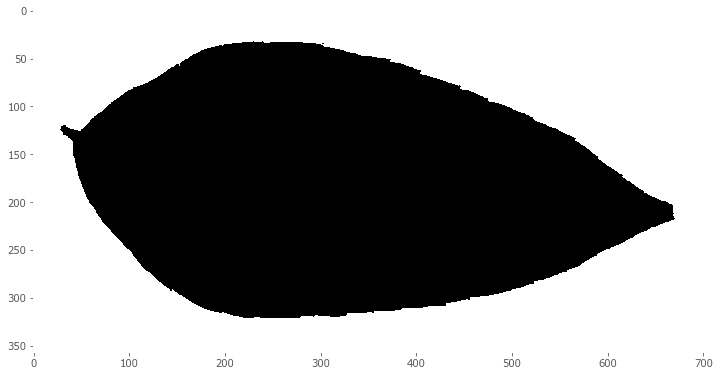

In [11]:
print(img.shape)
plt.imshow(img, cmap='Greys')
plt.grid(None)

Все изображения имеют разный размер, будем приводить их к размеру 100x100 с помощью функции scipy.misc.imresiz:

In [12]:
from scipy.misc import imresize

In [13]:
img_resized = imresize(img, (100, 100))

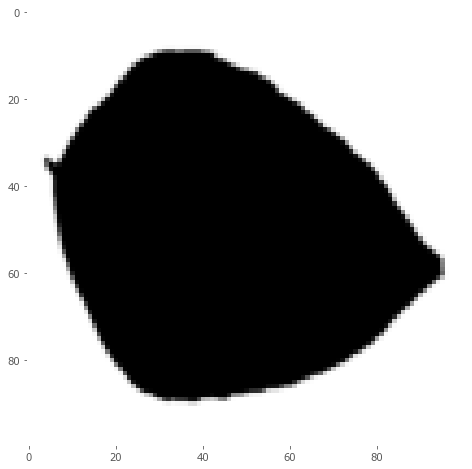

In [14]:
plt.imshow(img_resized, cmap='Greys')
plt.grid(None)

## Загрузка изображений (1 балл)
Загрузите все изображения листьев, отмасштабируйте, вытяните в вектор длины 10000 (np.ravel) и запишите их в массив размера (число изображений) x 10000. Сделайте два массива - с обучающими и контрольными картинками (останутся только не картинки, которые встречались в табличных данных), назовите их imgs_train и imgs_test. В итоге мы превратим картинки в попиксельные признаковые описания объектов-листьев.

In [15]:
num_images = 1585

img_matrix = np.zeros((num_images, 10000))

for i in range(1, num_images):
    file = str(i) + '.jpg'
    filepath = os.path.join(IMG_DIR, file)
    img = plt.imread(filepath)
    img_resized = imresize(img, (100, 100))
    img_vector = img_resized.ravel()
    img_matrix[i-1] = img_vector
    
# # check
# a = img_matrix.flatten()
# u, indices = np.unique(a, return_index=True)
# u

In [16]:
imgs_train = img_matrix[leaf_train_ids-1]
imgs_test = img_matrix[leaf_test_ids-1]

## 1. Visualization
Начнем с простой визуализации наших данных. Вам понадобится рисовать несколько картинок на одной - в виде таблицы. Это делается с помощью plt.subplot. Например, нарисуем 25 степенных функций:

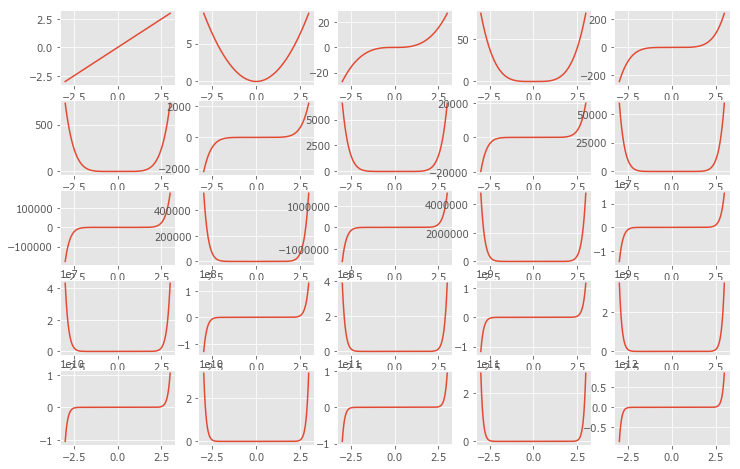

In [17]:
xs = np.linspace(-3, 3, 1000)
for i in range(1, 26): # числа от 1 до 25
    plt.subplot(5, 5, i) # первое число - сколько картинок по вертикали, второе - сколько по горизонтали, 
                         # третье - номер текущей картинки, если ситать слева направо, сверху вниз
    plt.plot(xs, xs**i)
    # plt.axis("off") # отключить оси, получится просто 25 линий

Кроме того, вам понадобится рисовать гистограммы. Это делается с помощью plt.hist:

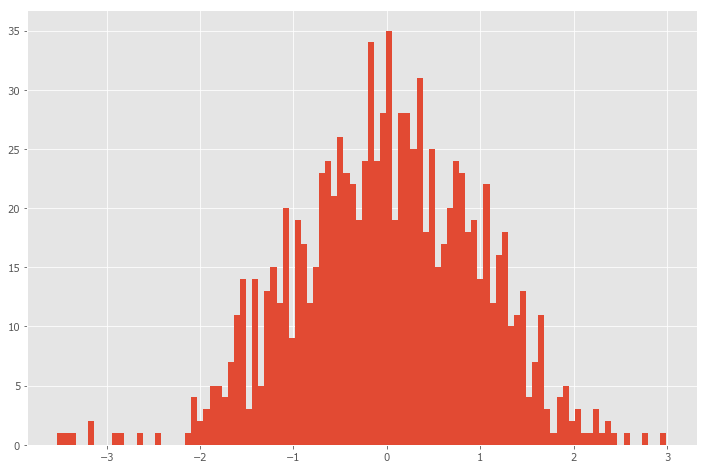

In [18]:
sample = np.random.normal(size=1000) # гистограмма строится по одномерной выборке - вектору чисел
_ = plt.hist(sample, bins=100) # то, что возвращает функция, сохранять никуда не нужно. bins=100 - число столбиков.

По гистограмме видно, какие значения наиболее популярны, какие - менее.

### Простая визуализация (0.5 балла код + 0.5 балла выводы)
* Нарисуйте в табличке 10x10 99 изображений листьев - по одному каждого класса (одна ячейка таблицы останется пустой)
* Нарисуйте в табличке 10x10 100 гистограмм значений случайно выбранных пикселей (берем значние пикселя на всех картинках и составляем из них вектор, используйте векторизацию)
* Нарисуйте 1 картинку - "средний лист". Просто усредните все пиксели по изображениям. Затем нарисуйте еще 1 картинку - разброс каждого пикселя (насколько он отклоняется от среднего). Для этого воспользуйтесь функцией np.std

Все пункты выполняйте с использованием обучающей выборки (у нас данные однородны).

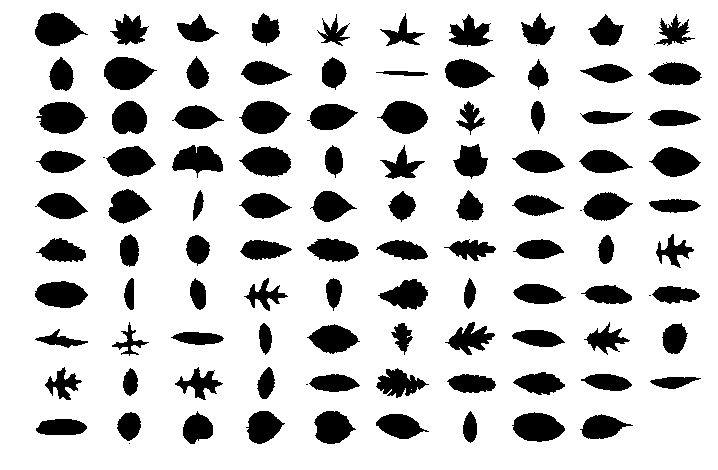

In [19]:
u, indices = np.unique(y_train, return_index=True)

c = 1
for i in indices: 
    row = table_data.iloc[train_idx].iloc[i]
    file = str(row['id']) + '.jpg'
    # print(row['species'])
    filepath = os.path.join(IMG_DIR, file)
    img = plt.imread(filepath)
    plt.subplot(10, 10, c)
    plt.imshow(img, cmap='Greys')
    plt.grid(None)
    plt.axis("off")
    c += 1

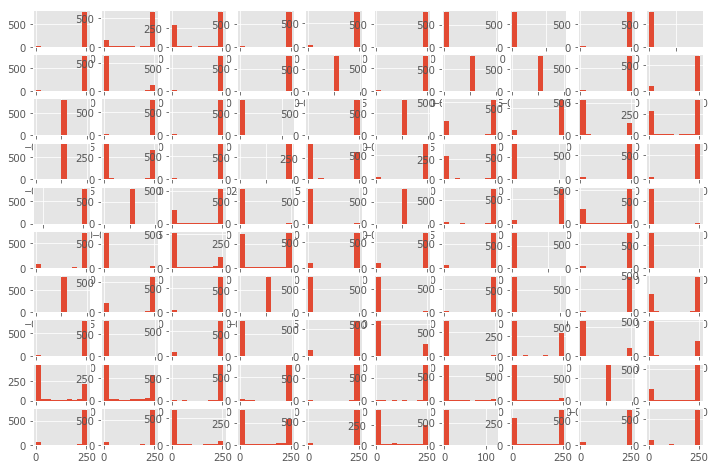

In [20]:
np.random.seed(random_seed)

pixels = np.random.choice(10000, size=100, replace=False)

c = 1
for p in pixels: 
    column = imgs_train[:, p]
    plt.subplot(10, 10, c)
    plt.hist(column, bins=10)
    c += 1

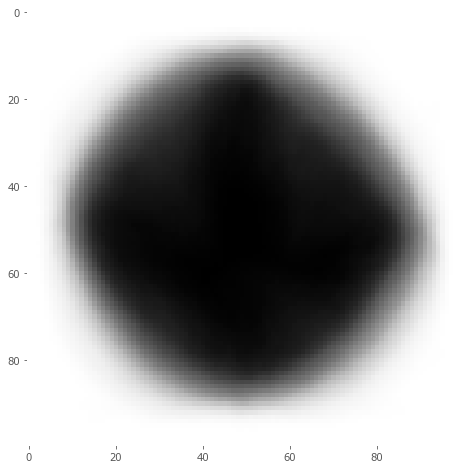

In [21]:
avg_leaf_vector = np.mean(imgs_train, axis=0)
avg_leaf = avg_leaf_vector.reshape((100, 100))
plt.imshow(avg_leaf, cmap='Greys')
plt.grid(None)

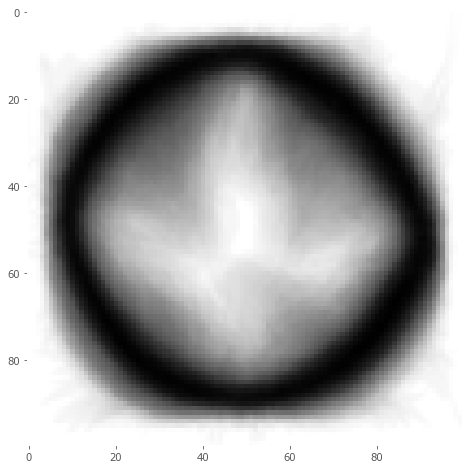

In [22]:
std_leaf_vector= np.zeros(10000)

for i in range(10000):
    std = np.std(imgs_train[:,i])
    std_leaf_vector[i] = std
    
std_leaf = std_leaf_vector.reshape((100, 100))
plt.imshow(std_leaf, cmap='Greys')
plt.grid(None)

Ответьте на вопросы:
* Можно ли отличить листья разных классов визуально? Можете ли вы выделить группы похожих классов?
* Каковы минимальное/максимальное значения признаков? Какого множество значений признаков? Какие значения чаще всего принимают признаки? Похожи ли распределения разных признаков между собой?
* Можно ли бинаризовать изображения (чтобы каждый пиксель принимал значение 0 или 1) без сильной потери информации? Почему вы так думаете? По какому порогу лучше бинаризовать?
* Похож ли "средний лист" на обычный лист? Как вы думаете, почему? Много ли пикселей, которые всегда принимают одно и то же значение (константный признак)? 

> * Да. Да, 0, 11 и 16 можно поместить в одну группу.
* 0/255. (0, 255). 0, 255. Да.
* Да. Потому что все признаки принимают в большинстве случаев значения 0 или 255. 122.
* Нет. Потому что усредняли много различных видов. Да.

### Понижение размерности (0.5 балла код + 0.5 балла выводы)
* Запустите t-SNE на обучающей выборке (если долго считается, берите меньше объектов) и визуализируйте с цветовым указанием классов. Выведите легенду цветов.
* Затем повторите предыдущий шаг с треми различными параметрами [расстояния Минковского](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.minkowski.html): p=2 (это евклидово расстояние, оно установлено по умолчанию), p=1 и p=np.infty. 

In [23]:
from sklearn.manifold import TSNE

In [24]:
tsne = TSNE(random_state=random_seed)
tsne_representation = tsne.fit_transform(imgs_train)

In [25]:
import matplotlib.cm as cm 

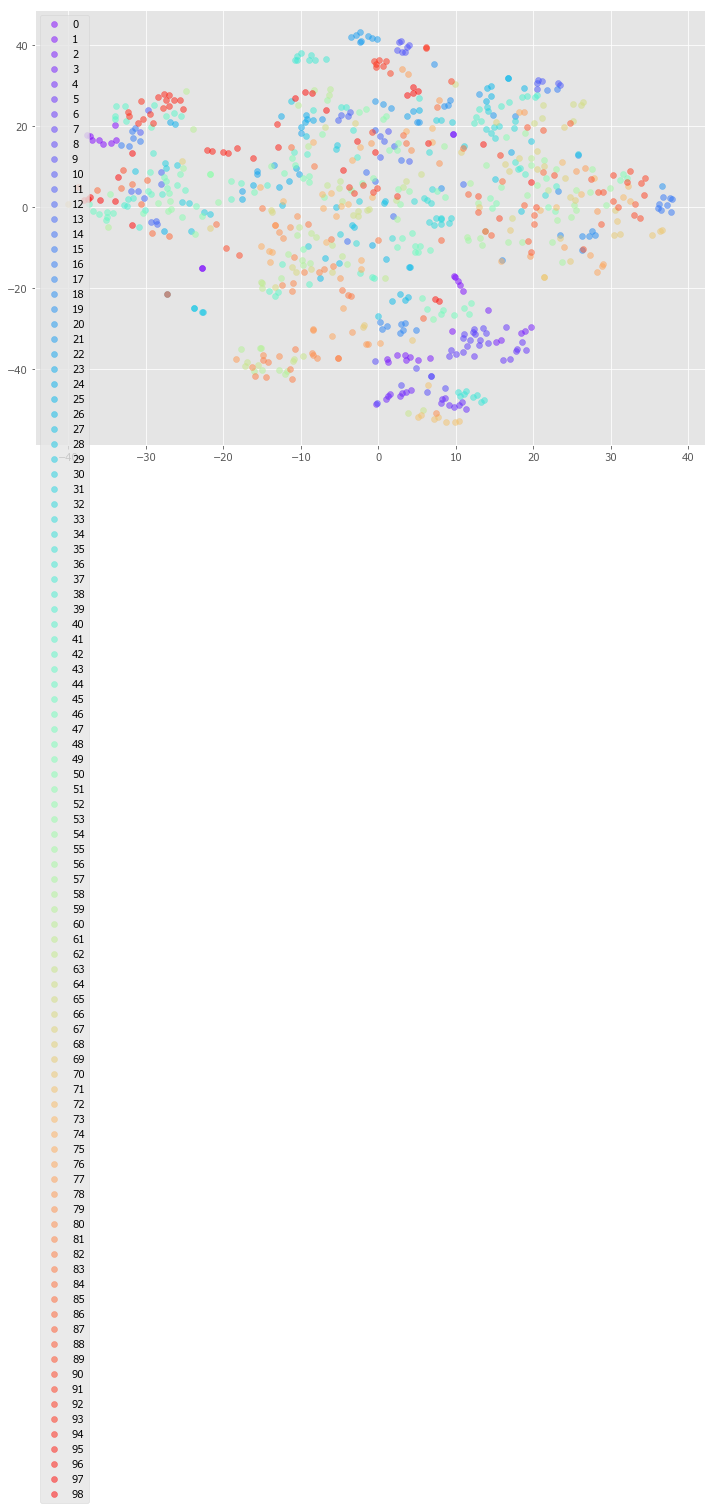

In [26]:
response_subset = y_train
colors = cm.rainbow(np.linspace(0, 1, len(set(response_subset))))

for r, c in zip(set(response_subset), colors):
    plt.scatter(tsne_representation[response_subset==r, 0], 
                tsne_representation[response_subset==r, 1], c=c, alpha=0.5, label=str(r))
_ = plt.legend()

In [27]:
# from sklearn.neighbors import DistanceMetric
# m = DistanceMetric.get_metric('minkowski', p=2)
# tsne = TSNE(metric='minkowski', random_state=random_seed)
# tsne_representation = tsne.fit_transform(imgs_train)

Ответьте на вопросы:
* Хорошо ли разделяются классы на визуализации? 
* Можно ли выделить группы похожих классов по визуализации? Если да, то похожи ли они на те, которые вы выделяли в предыдущей секции вопросов?
* С каким параметром расстояния Минковского визуализация получается лучше всего? Предположите, почему (для этого надо разобраться, как работает расстояние с p=1 и p=бесконечность применительно к картинкам)

> * Да.
* Да. Навскидку да, 0, 11 и 16 в группе. 

## 2. Exploration
Теперь попробуем разобраться с внутренней структурой наших данных: применим к ним кластеризацию. Ограничимся самым простым методом - KMeans.

### Понижение размерности (0.5 балла код + 0.5 балла выводы)
* Выполните кластеризацию листьев с помощью KMeans на 9 кластеров. Метрика по умолчанию.
* Как вы знаете, у каждого кластера в KMeans есть центр - вектор той же размерности, что и объекты. Визуализируйте центры кластеров (переменная cluster\_centers\_ - то же самое, что centers в семинаре) в виде изображений 100x100, оформите их табицей 3x3.
* Повторите предыдущие действия для 25 и 100 кластеров.

In [28]:
from sklearn.cluster import KMeans

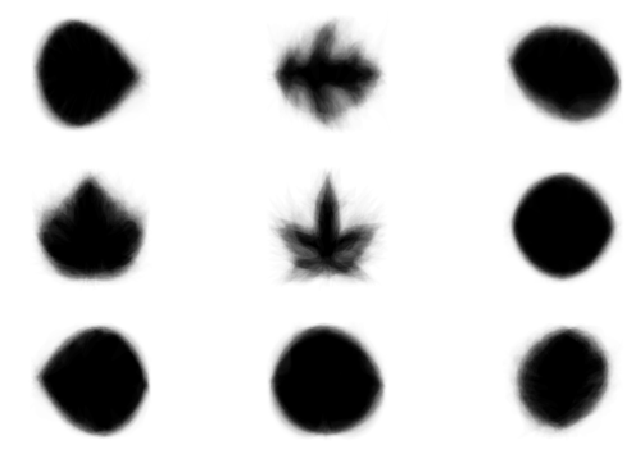

In [29]:
np.random.seed(random_seed)

km = KMeans(n_clusters=9)
km.fit(imgs_train)

labels_ = km.predict(imgs_train)
img_centers = np.array([i.reshape((100,100)) for i in km.cluster_centers_])
c = 1
for img in img_centers: 
    plt.subplot(3, 3, c)
    plt.imshow(img, cmap='Greys')
    plt.axis("off")
    c += 1

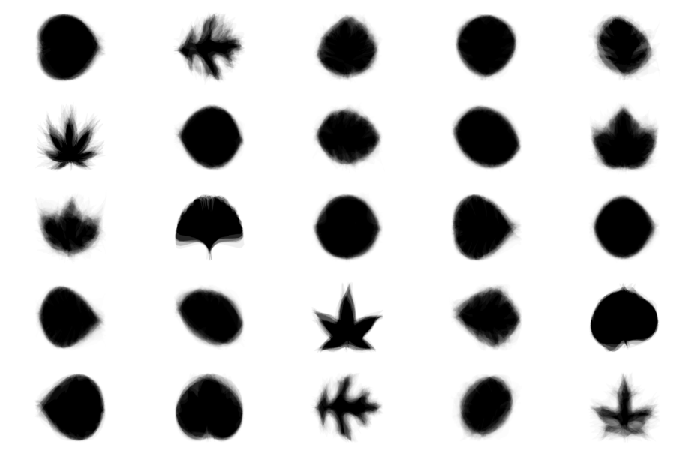

In [30]:
np.random.seed(random_seed)

km = KMeans(n_clusters=25)
km.fit(imgs_train)

labels_ = km.predict(imgs_train)
img_centers = np.array([i.reshape((100,100)) for i in km.cluster_centers_])
c = 1
for img in img_centers: 
    plt.subplot(5, 5, c)
    plt.imshow(img, cmap='Greys')
    plt.axis("off")
    c += 1

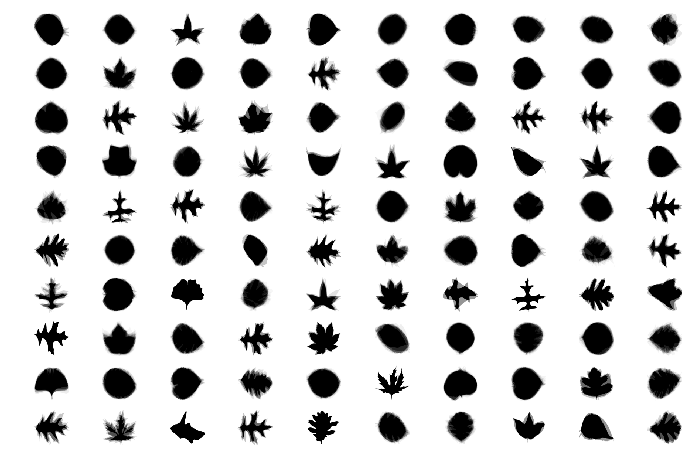

In [31]:
np.random.seed(random_seed)

km = KMeans(n_clusters=100)
km.fit(imgs_train)

labels_ = km.predict(imgs_train)
img_centers = np.array([i.reshape((100,100)) for i in km.cluster_centers_])
c = 1
for img in img_centers: 
    plt.subplot(10, 10, c)
    plt.imshow(img, cmap='Greys')
    plt.axis("off")
    c += 1

Ответьте на вопросы:
* Похожи ли центры кластеров на листья?
* В чем отличие от картинок листьев? В чем причина этого отличия?
* Есть ли среди кластеров похожие (или повторяющиеся)? 
* Какое, по вашему мнению, количество кластеров лучше всего подходит под эти данные? Почему?

> * Да.
* Размытость. В том что картинка представляет кластер листьев, а не лист.
* Да.
* 100, там есть наиболее четкие картинки, и потому что число кластеров совпадает с числом классов(почти).

__Бонус 1 (1 доп. балл)__

Повторите кластеризацию с другими метриками, рассмотренными в разделе Визуализация. Отличаются ли результаты? 

## 3. Prediction
Перейдем к решению задачи предсказания.

### 3 классификатора (0.5 балла код + 0.5 балла выводы)
Настройте 3 классификатора и выполните их визуализацию.
* Начнем с примитивного метрического классификатора - [центроидного](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html). Он использует идеи k-Means для решения задачи классификации: для каждого класса находит его центр (усреднением) - это обучение, а затем на этапе предсказания относит объект к тому классу, к центру которого он ближе. Настройте классификатор с гиперпараметрами по умолчанию на обучающей выборке. Выведите качество предсказания (accuracy) на контрольной выборке.
* Теперь по аналогии с KMeans визуализируйте центры классов - нарисуйте 99 изображений.
* Второй классификатор - наивный байесовский. Мы не рассматривали его в курсе, но про него можно почитать в [документации sklearn](http://scikit-learn.org/stable/modules/naive_bayes.html). Мы знаем, что наши признаки принимаю целочисленные значения, поэтому для описания признаков подойдет мультиномиальное распределение. Настройте MultinomialNB для наших данных, выведите качество на контрольных данных.
* У MultinomialNB после обучения появляется параметр feature\_log\_prob_ - это оцененный по данным логарифм вероятности $P(x_i|y)$. Визуализируйте эту матрицу в виде изображений 100x100 по аналогии с предыдущим классификатором.
* Третий классификатор - линейный. Настройте LogisticRegression и выведите качество на контрольной выборке.
* Отобразите веса для каждого класса в виде картинки 100x100.

In [32]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.metrics import accuracy_score

In [33]:
clf = NearestCentroid()
clf.fit(imgs_train, y_train)

y_pred = clf.predict(imgs_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %f" % accuracy)

Accuracy: 0.550505


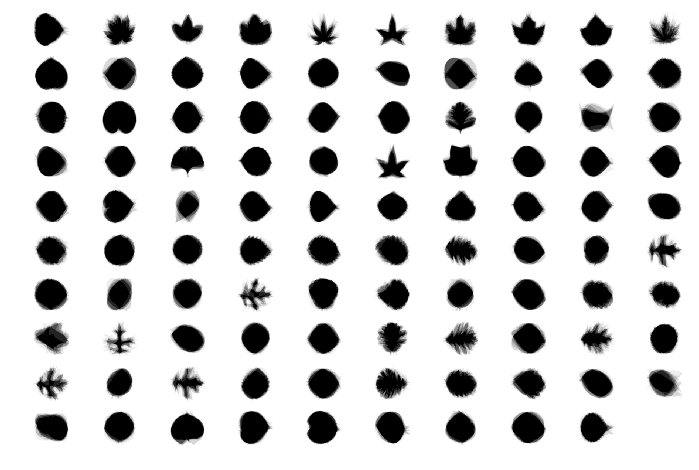

In [34]:
img_centers = np.array([i.reshape((100,100)) for i in clf.centroids_])
c = 1
for img in img_centers: 
    plt.subplot(10, 10, c)
    plt.imshow(img, cmap='Greys')
    plt.axis("off")
    c += 1

In [35]:
from sklearn.naive_bayes import MultinomialNB

In [36]:
gnb = MultinomialNB()
gnb.fit(imgs_train, y_train)

y_pred = gnb.predict(imgs_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %f" % accuracy)

Accuracy: 0.510101


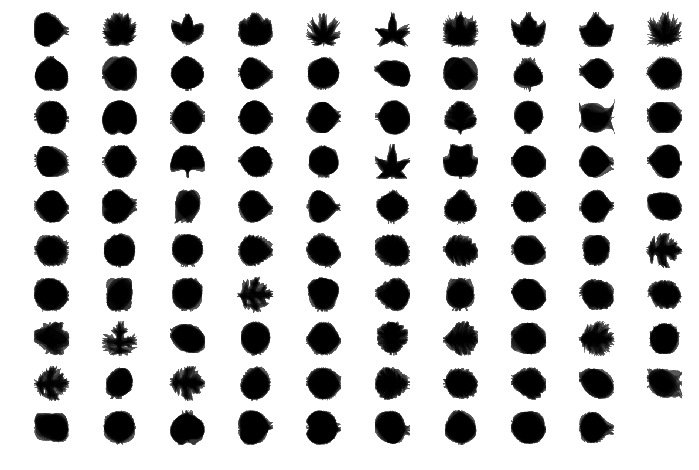

In [37]:
img_centers = np.array([i.reshape((100,100)) for i in gnb.feature_log_prob_])
c = 1
for img in img_centers: 
    plt.subplot(10, 10, c)
    plt.imshow(img, cmap='Greys')
    plt.axis("off")
    c += 1

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
lr = LogisticRegression()
lr.fit(imgs_train, y_train)

y_pred = lr.predict(imgs_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %f" % accuracy)

Accuracy: 0.585859


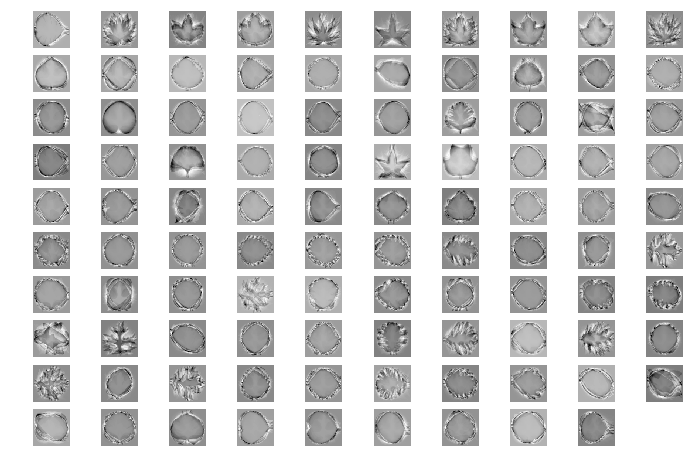

In [40]:
img_centers = np.array([i.reshape((100,100)) for i in lr.coef_])
c = 1
for img in img_centers: 
    plt.subplot(10, 10, c)
    plt.imshow(img, cmap='Greys')
    plt.axis("off")
    c += 1

Ответьте на вопросы:
* Какой классификатор работает лучше? Предположите, почему.
* Похожи ли центры кластеров на исходные изображения листьев? А визуализированные вероятности? А веса?
* Как вы думаете, почему картинки весов линейного классификатора отличаются от остальных визуализаций?

> * Логистическая. Может, из-за линейности. 
* Да. Да. Да.
* Пиксели(веса) серые, потому что после домножения на признаки они – это степень числа Эйлера, следовательно, они не должны слишком разниться. 

### Случайный лес (0.25 балла код + 0.25 балла выводы)
* Настройте случайный лес на наших данных. Выведите качество на контроле.
* Отобразите feature\_importances\_ в виде картинки 100x100.

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
np.random.seed(random_seed)

rfc = RandomForestClassifier()
rfc.fit(imgs_train, y_train)

y_pred = rfc.predict(imgs_test)
accuracy_rfc = accuracy_score(y_test, y_pred)
print("Accuracy: %f" % accuracy_rfc)

Accuracy: 0.378788


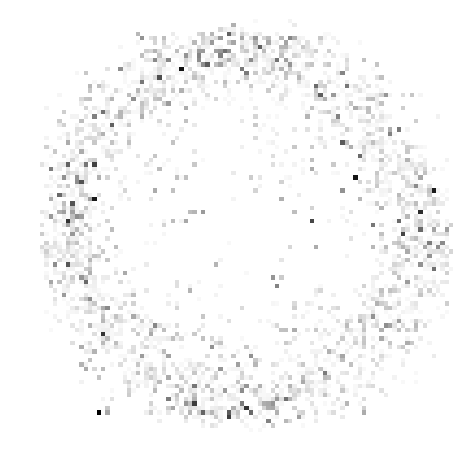

In [43]:
img = rfc.feature_importances_.reshape((100,100))

plt.imshow(img, cmap='Greys')
_ = plt.axis("off")

Ответьте на вопросы:
* похожа ли картинка на изображение листа?
* соответствует ли картинка здравому смыслу? Можно ли сказать, что участки картинки, которые RF определил как неважные, действительно не помогают определить класс листа? Ответить на вопрос поможет сопоставление с изображением разброса каждого признака по выборке (см. раздел Простая визуализация, последний пункт).

> * Нет.
* Да. Нет, просто за важные признаки алгоритм выделяет малое количетсво признаков, что не подходит для этой задачи.  

### Другой наивный байесовский классификатор (0.25 балла код + 0.25 балла выводы)
* В разделе Простая визуализаия вы придумали порог, по которому можно бинаризовать картинки. Выполните эту бинаризацию и настройте BernoulliNB, выведите качество на контроле.
* Визуализируйте вероятности.

In [44]:
from sklearn.naive_bayes import BernoulliNB

In [45]:
bnb = BernoulliNB(binarize=122)
bnb.fit(imgs_train, y_train)

y_pred = bnb.predict(imgs_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %f" % accuracy)

Accuracy: 0.515152


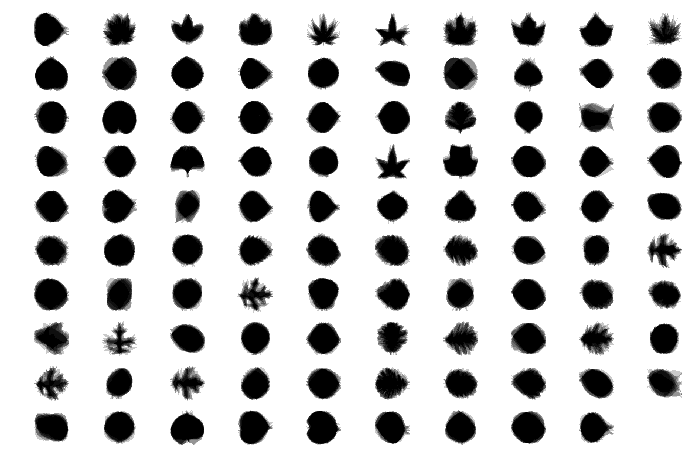

In [46]:
img_centers = np.array([i.reshape((100,100)) for i in bnb.feature_log_prob_])
c = 1
for img in img_centers: 
    plt.subplot(10, 10, c)
    plt.imshow(img, cmap='Greys')
    plt.axis("off")
    c += 1

Ответьте на вопросы:
* Улучшилось на качество классификации по сравнению с MultinomialNB? Как вы думаете, почему?
* Похожи ли картинки на листья?

> * Чуть-чуть. Потому алгоритм использует бинаризацию.
* Да.

## 4. Feature engeneering and selection

Попробовали методы - надо попробовать новые признаки.

### Понижение размерности + RF (0.5 балла код + 0.5 балла выводы)
Сейчас наши данные имеют высокую размерность признакового описания - 10000. А надо ли столько много? Не окажется ли, что реально вся информация может быть записана в гораздо меньшее количество признаков?
* Для всех значений числа компонент в num_components обучите PCA с такой размерностью и на этих признаках обучите случайный лес. Запишите в отдельные массивы качество на обучении и качество на контроле. 
* Для RF на исходных признаках выведите качество и на контроле, и на обучении.
* На одной картинке постройте три графика: по оси x - число компонент, по оси ординат - качество; первый график - качество на обуении, второй - качество на контроле, третий - горизонтальная прямая (качество на контроле на исходных признаках).

_Примечание._ Чтобы построить 3 графика на одной картинке, просто используйте plt.plot(xs, ys) три раза подряд. После этого вставьте строку plt.xscale("log"), чтобы масштаб по оси абсцисс был логарифмическим.

In [47]:
num_components = 2**np.arange(10)

In [48]:
from sklearn.decomposition import PCA

In [49]:
np.random.seed(random_seed)

acc_train = []
acc_test = []

for n in num_components:  
    pca = PCA(n_components=n)
    pca.fit(imgs_train)
    X_train_new = pca.transform(imgs_train)
    X_test_new = pca.transform(imgs_test)
    
    rfc = RandomForestClassifier()
    rfc.fit(X_train_new, y_train)

    y_pred_train = rfc.predict(X_train_new)
    y_pred_test = rfc.predict(X_test_new)
    
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    
    acc_train.append(accuracy_train)
    acc_test.append(accuracy_test)
    
    print("PCA components: %i, Accuracy train: %f, Accuracy test: %f" % (n, accuracy_train, accuracy_test))

PCA components: 1, Accuracy train: 0.916667, Accuracy test: 0.075758
PCA components: 2, Accuracy train: 0.974747, Accuracy test: 0.141414
PCA components: 4, Accuracy train: 0.984848, Accuracy test: 0.237374
PCA components: 8, Accuracy train: 0.993687, Accuracy test: 0.383838
PCA components: 16, Accuracy train: 0.992424, Accuracy test: 0.388889
PCA components: 32, Accuracy train: 0.993687, Accuracy test: 0.409091
PCA components: 64, Accuracy train: 0.997475, Accuracy test: 0.378788
PCA components: 128, Accuracy train: 0.997475, Accuracy test: 0.308081
PCA components: 256, Accuracy train: 0.998737, Accuracy test: 0.262626
PCA components: 512, Accuracy train: 1.000000, Accuracy test: 0.207071


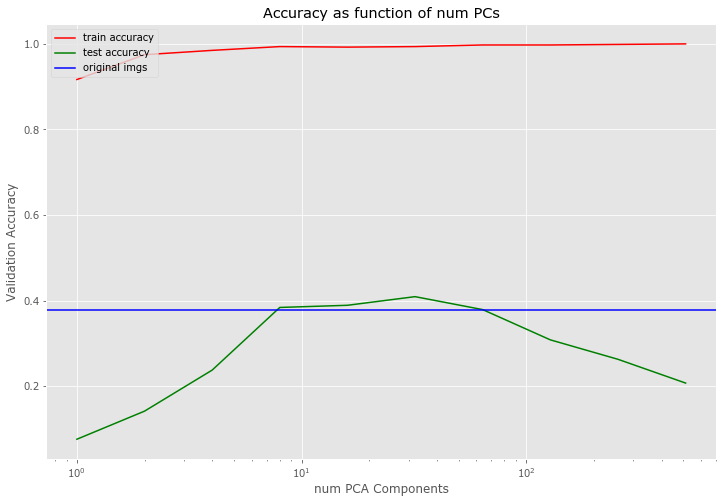

In [50]:
plt.plot(num_components, acc_train, c='red') 
plt.plot(num_components, acc_test, c='green') 
plt.axhline(y=accuracy_rfc, c='blue')
plt.xscale("log")

plt.legend(['train accuracy','test accuracy','original imgs'],loc=2)
plt.xlabel('num PCA Components'); 
plt.ylabel('Validation Accuracy'); 
_ = plt.title('Accuracy as function of num PCs')

Ответьте на вопросы:
* Можно ли сказать, что случайный лес переобучается?
* Можно ли указать число компонент, при котором достигается максимальное качество на контроле? Сильно ли это значение отличается от качество на всех признаках?

> * Да.
* Да. Достаточно.

### Отбор признаков (0.5 балла код + 0.5 балла выводы)
* Обучите SelectKBest на обучающих данных. Он ранжирует признаки согласно статистическому тесту, оценивающему согласованность каждого признака с целевой переменной.
* Визуализруйте scores\_ как картинку 100x100.
* Оставьте 100 самых важных признаков и обучите на них логистическую регрессию. Выведите качество на контрольной выборке.

In [51]:
from sklearn.feature_selection import SelectKBest

/Users/Alexander/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [   0    1    2 ..., 9997 9998 9999] are constant.
  UserWarning)
/Users/Alexander/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


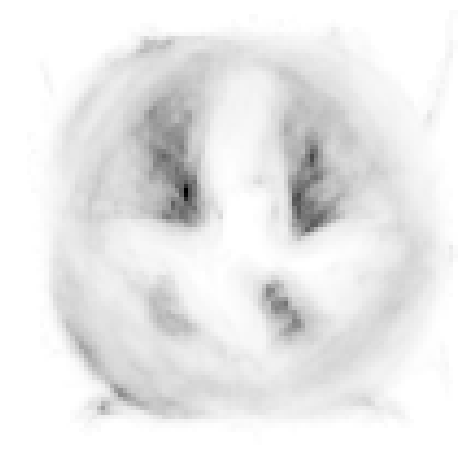

In [52]:
import sklearn
skb = SelectKBest()
skb.fit(imgs_train, y_train)

img_scores = skb.scores_.reshape((100, 100))
plt.imshow(img_scores, cmap='Greys')
_ = plt.axis("off")

In [53]:
skb = SelectKBest(k=100)
skb.fit(imgs_train, y_train)

new_features_train = imgs_train[:, skb.get_support()]
new_features_test = imgs_test[:, skb.get_support()]

/Users/Alexander/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [   0    1    2 ..., 9997 9998 9999] are constant.
  UserWarning)
/Users/Alexander/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [54]:
lr = LogisticRegression()
lr.fit(new_features_train, y_train)

y_pred = lr.predict(new_features_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %f" % accuracy)

Accuracy: 0.050505


Ответьте на вопрос:
* Разумно ли предложенное алгоритмом ранжирование? Верно ли, что признаки, котореы он указал как неважные, действительно не помогают классифицировать листья?
* Сильно ли изменилось качество решения задачи после отбора признаков?

> * Да. Нет.
* Да.

## 5. Hyperparameters tuning
Наконец, пришло время настроить гиперпараметры модели и получить итоговое качество. В этом пункте мы возьмем табличные данные - те, которые открывали в самом начале. Это некие характеристики листьев, извлеченные из картинок. Будем считать это хорошим feature engineering'ом - как будто мы взяли и нагенерировли хороших признаков. Теперь настроим под них классификатор.

### Настройка гиперпараметров случайного леса (2 балла)
С помощью `GridSearchCV` или `RandomizedSearchCV` подберите параметры для случайного леса

* Используйте `StratifiedKFold` на 4х фолдах (используйте только обучающую выборку). Мера качества - `accuracy`
* Примените оптимальную модель на контрольной выборке
* Для нескольких любых случаев, где была допущена ошибка, выведите истинное изображение листа и одно из изображений листа предсказанного класса.

In [55]:
from sklearn.grid_search import GridSearchCV

/Users/Alexander/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/Alexander/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [56]:
np.random.seed(random_seed)

rfc = RandomForestClassifier()

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4,5,6,7,8],
    'criterion': ['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=4)
CV_rfc.fit(X_train, y_train) # it will take ~10min

GridSearchCV(cv=4, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [57]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 200}

In [58]:
np.random.seed(random_seed)

rfc_best = RandomForestClassifier(max_features='log2', n_estimators=200, max_depth=8, criterion='gini')
rfc_best.fit(X_train, y_train)

y_pred = rfc_best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %f" % accuracy)

Accuracy: 0.949495


In [59]:
# indices of wrong in x_test
indices_of_wrong = np.where(y_test != y_pred)[0]
indices_of_wrong

array([ 28,  32,  36,  54, 118, 125, 130, 152, 162, 171])

In [60]:
# img ids of wrong
ids_of_wrong = leaf_test_ids[test_idx[indices_of_wrong]].values
ids_of_wrong

array([1339,  228, 1454,  245,  678,  757, 1575,  944, 1253,  992])

In [61]:
# true classes of wrong
classes_of_wrong = y[test_idx[indices_of_wrong]]
classes_of_wrong

array([68, 55, 69, 75, 28, 23, 40, 69, 68, 18])

In [62]:
species_true = le.inverse_transform(y[test_idx[indices_of_wrong]])
species_true

array(['Quercus_Infectoria_sub', 'Quercus_Castaneifolia',
       'Quercus_Kewensis', 'Quercus_Pubescens', 'Eucalyptus_Glaucescens',
       'Cornus_Controversa', 'Magnolia_Salicifolia', 'Quercus_Kewensis',
       'Quercus_Infectoria_sub', 'Callicarpa_Bodinieri'], dtype=object)

In [63]:
# predicted classes of wrong
y_pred[indices_of_wrong]

array([92, 10, 79, 56, 29, 24, 39, 90, 27, 91])

In [64]:
# predicted classes of wrong
species_wrong = le.inverse_transform(y_pred[indices_of_wrong])
species_wrong

array(['Tilia_Oliveri', 'Alnus_Cordata', 'Quercus_Semecarpifolia',
       'Quercus_Cerris', 'Eucalyptus_Neglecta', 'Cornus_Macrophylla',
       'Magnolia_Heptapeta', 'Salix_Intergra', 'Cytisus_Battandieri',
       'Sorbus_Aria'], dtype=object)

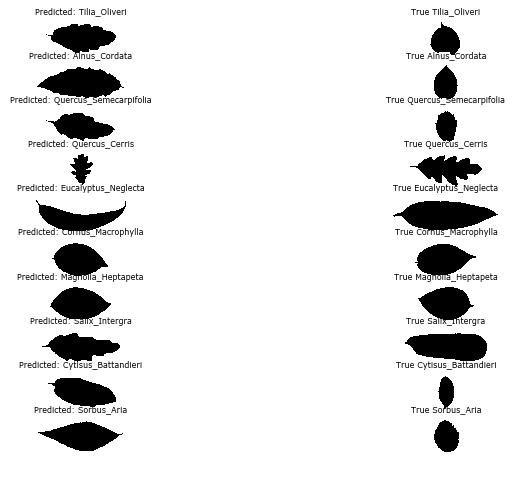

In [65]:
c = 1
for it in range(len(ids_of_wrong)): 
    i = ids_of_wrong[it]
    species = species_wrong[it]
    plt.subplot(10, 2, c) 
    filepath = os.path.join(IMG_DIR, str(i)+'.jpg')
    img = plt.imread(filepath)
    plt.imshow(img, cmap='Greys')
    plt.grid(None)
    plt.axis("off")
    plt.title("Predicted: %s"%species, fontsize=8)
    c += 1
    plt.subplot(10, 2, c)
    id_of_true_example = table_data[table_data['species'] == species].iloc[0]['id']
    filepath = os.path.join(IMG_DIR, str(id_of_true_example)+'.jpg')
    plt.title("True %s"%species, fontsize=8)
    img = plt.imread(filepath)
    plt.imshow(img, cmap='Greys')
    plt.grid(None)
    _ = plt.axis("off")
    c += 1

Часто при решении задачи еще используется шестой шаг - композиции методов. Но в данном задании мы это пропустим :)

__Доп. задание (1-2 балла)__
Попробуйте придумать какие-нибудь признаки из сырых данных (картинок) или табличных и настроить на них случайный лес. Ваша цель - улучшить качество классификации по сравнению с исходными признаками.

In [66]:
from sklearn.neural_network import MLPClassifier

In [67]:
np.random.seed(random_seed)

new_attribute_train = np.multiply(X_train['margin1'], X_train['margin2'])
X_train_new = pd.concat([X_train, new_attribute_train], axis=1)
new_attribute_test = np.multiply(X_test['margin1'], X_test['margin2'])
X_test_new = pd.concat([X_test, new_attribute_test], axis=1)

rfc_best = RandomForestClassifier(max_features='log2', n_estimators=200, max_depth=8, criterion='gini')
rfc_best.fit(X_train_new, y_train)

y_pred = rfc_best.predict(X_test_new)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %f" % accuracy)

Accuracy: 0.959596


> Улучшил